In [199]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import sklearn
from scipy import stats
sns.set_style("dark")

In [168]:
# Read in data
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [169]:
# Combine data
frames = [train, test]
data = pd.concat(frames)

In [170]:
data.shape

(2919, 81)

In [171]:
data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [172]:
# Drop unnecessary columns or columns with too few values
cols_to_drop = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MiscVal', 'FireplaceQu', 'GarageYrBlt', 'PoolArea']
def drop_unnecessary_cols(data=data, cols_to_drop=cols_to_drop):
    for i in cols_to_drop:
        data.drop([i], axis=1, inplace=True)
    return data

drop_unnecessary_cols()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,24,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,474,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,80,32,0,0,0,7,2006,WD,Normal,NaN


In [173]:
data['SalePrice'].replace('', np.nan, inplace=True)
data.dropna(subset=['SalePrice'], inplace=True)

In [174]:
data.shape

(1460, 72)

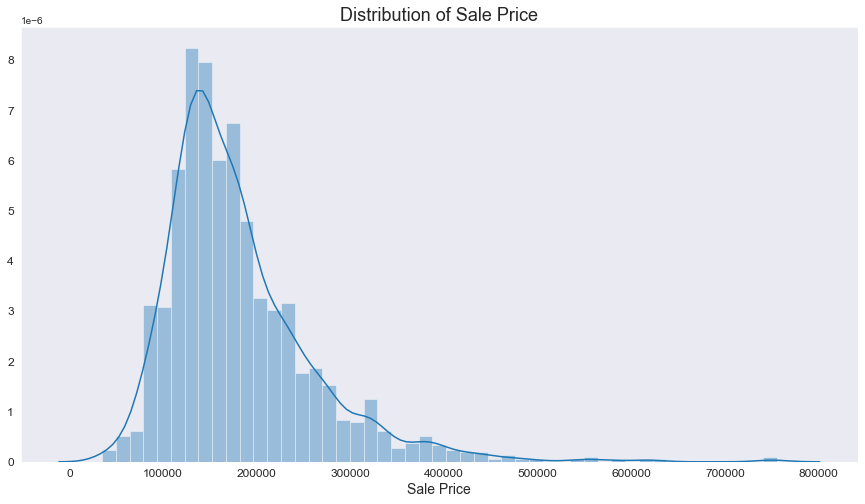

In [276]:
plt.figure(figsize = (15,8))
ax = sns.distplot(data['SalePrice'])
plt.title('Distribution of Sale Price', size=18)
ax.set_xlabel(xlabel='Sale Price', size=14)
plt.xticks(size=12)
plt.yticks(size=12);


In [218]:
data['SalePrice'].mean(), data['SalePrice'].median()

(180921.19589041095, 163000.0)

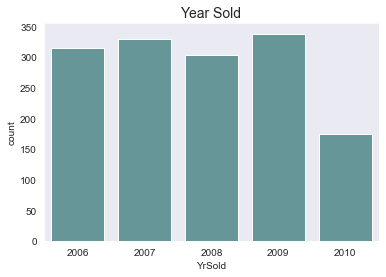

In [206]:
sns.countplot(data['YrSold'], color='cadetblue')
plt.title('Year Sold', size=14);

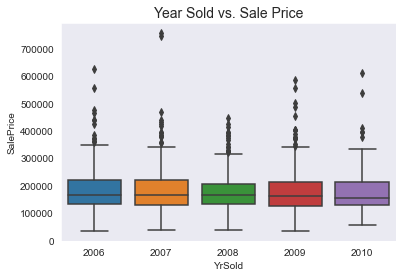

In [209]:
# Boxplot of sale prices by year sold
sns.boxplot(x='YrSold', y='SalePrice', data=data)
plt.title('Year Sold vs. Sale Price', size=14);

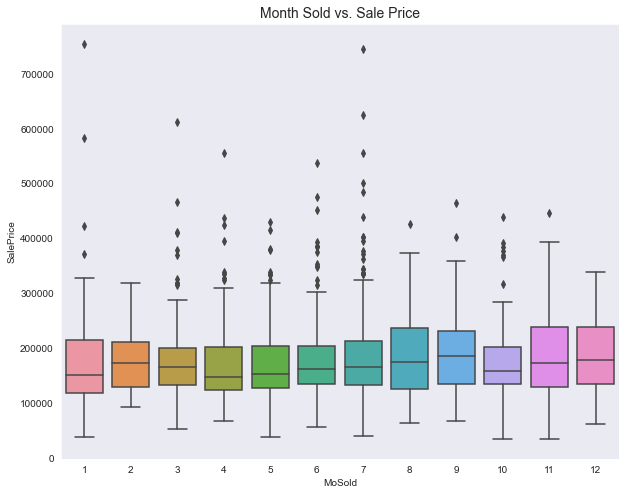

In [216]:
plt.figure(figsize = (10,8))
sns.boxplot(x='MoSold', y='SalePrice', order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], data=data)
plt.title('Month Sold vs. Sale Price', size=14);

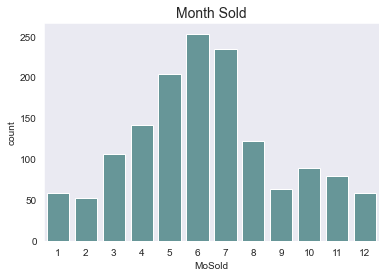

In [232]:
sns.countplot(data['MoSold'], color='cadetblue')
plt.title('Month Sold', size=14);

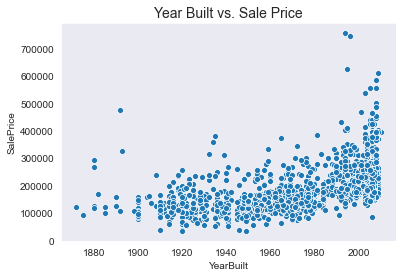

In [234]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)
plt.title('Year Built vs. Sale Price', size=14);

In [253]:
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

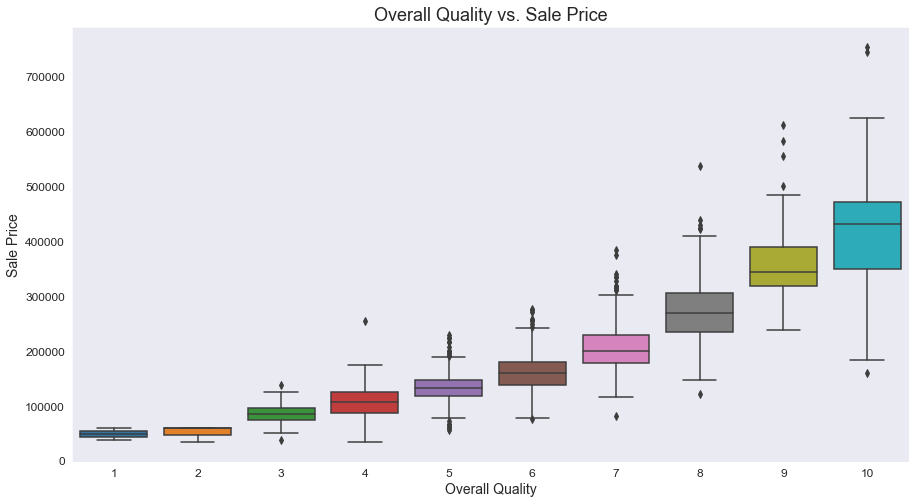

In [275]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Overall Quality vs. Sale Price', size=18)
ax.set_xlabel(xlabel='Overall Quality', size=14)
ax.set_ylabel(ylabel='Sale Price', size=14)
plt.xticks(size=12)
plt.yticks(size=12);

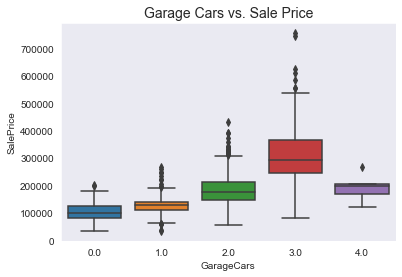

In [237]:
sns.boxplot(x='GarageCars', y='SalePrice', data=data)
plt.title('Garage Cars vs. Sale Price', size=14);

In [227]:
pd.set_option('display.max_columns', None)
data[data['GarageType'].isnull()]['YearBuilt'].mean()

1942.4814814814815

In [228]:
data['YearBuilt'].mean()

1971.267808219178

We can see that the average year built for homes with nans in garage columns was 1942 and we can conlude that they have no garages.

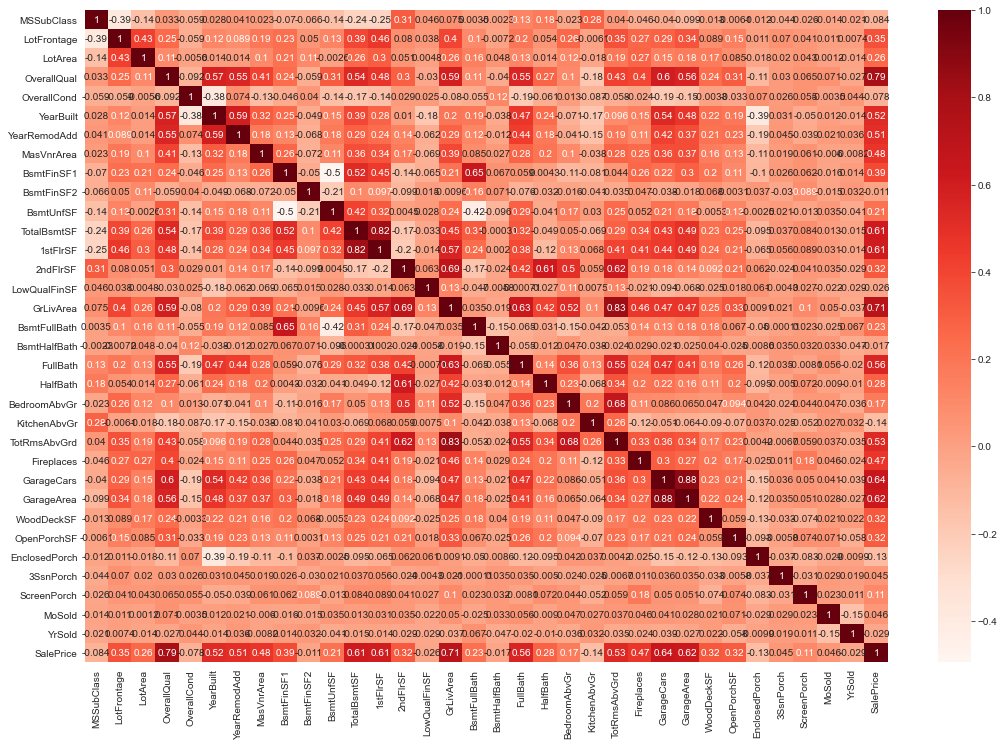

In [230]:
# Plot heatmap of Pearson correlation
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()


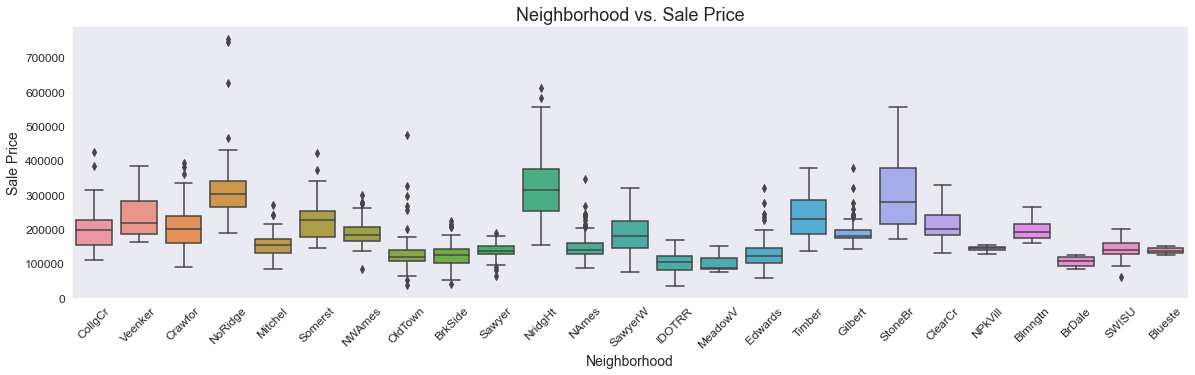

In [278]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Neighborhood vs. Sale Price', size=18)
ax.set_xlabel(xlabel='Neighborhood', size=14)
ax.set_ylabel(ylabel='Sale Price', size=14)
plt.xticks(size=12, rotation=45)
plt.yticks(size=12);

In [165]:

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [119]:
# Which columns have missing values?
[col for col in data.columns if data[col].isnull().any()]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [120]:
# LotFrontage- fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [121]:
# MasVnrType
print(data['MasVnrType'].value_counts())
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [122]:
# MasVnrArea
print(data['MasVnrArea'].value_counts())
# Fill missing MasVnrArea values with 0 (mode)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [123]:
# BsmtQual- there are only 37 missing values
print(len(data) - sum(data['BsmtQual'].value_counts()))
# Fill missing BsmtQual with None, assuming it is empty because there is no basement
data['BsmtQual'] = data['BsmtQual'].fillna('None')

37


In [124]:
# BsmtCond - also only 37 missing values
print(len(data) - sum(data['BsmtCond'].value_counts()))
# Fill missing BsmtCond with None, assuming it is empty because there is no basement
data['BsmtCond'] = data['BsmtCond'].fillna('None')

37


In [125]:
# BsmtExposure - only 38 missing values
print(len(data) - sum(data['BsmtExposure'].value_counts()))
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

38


In [126]:
# BsmtFinType1 - only 38 missing values
print(len(data) - sum(data['BsmtFinType1'].value_counts()))
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

37


In [127]:
# BsmtFinType2 - only 38 missing values
print(len(data) - sum(data['BsmtFinType2'].value_counts()))
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

38


In [128]:
# Electrical - just 1 missing value
# Fill missing Electrical value with mode (SBrkr)
print(data['Electrical'].value_counts())
print(len(data) - sum(data['Electrical'].value_counts()))
data['Electrical'] = data['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


In [129]:
# GarageType - 81 missing values. It is reasonable to believe that these homes don't have garages
# Fill missing GarageType with None
print(len(data) - sum(data['GarageType'].value_counts()))
data['GarageType'] = data['GarageType'].fillna('None')

81


In [130]:
# GarageQual - 81 missing values.
# Fill missing GarageQual with None
print(len(data) - sum(data['GarageQual'].value_counts()))
data['GarageQual'] = data['GarageQual'].fillna('None')

81


In [131]:
# Fill missing GarageCond with None
print(len(data) - sum(data['GarageCond'].value_counts()))
data['GarageCond'] = data['GarageCond'].fillna('None')

81


In [132]:
# Fill missing GarageFinish with None
print(len(data) - sum(data['GarageFinish'].value_counts()))
data['GarageFinish'] = data['GarageFinish'].fillna('None')

81


In [133]:
# Change these numbers to strings
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [134]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [135]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)

In [136]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)

In [137]:
# Convert neighborhood to categorical
neighborhood_cat = pd.get_dummies(data.Neighborhood, prefix='neigh')
data2 = pd.concat([data, pd.get_dummies(data['Neighborhood'], prefix='neigh', drop_first=True)], axis=1)
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [138]:
# Convert BldgType to categorical
data2 = pd.concat([data2, pd.get_dummies(data2['BldgType'], prefix='BldgType', drop_first=True)], axis=1)

In [139]:
# MSSubClass
data3 = pd.concat([data2, pd.get_dummies(data2['MSSubClass'], prefix='MSSubClass', drop_first=True)], axis=1)
# MSZoning
data4 = pd.concat([data3, pd.get_dummies(data2['MSZoning'], prefix='MSZoning', drop_first=True)], axis=1)
# Street
data5 = pd.concat([data4, pd.get_dummies(data2['Street'], prefix='Street', drop_first=True)], axis=1)
# LotShape
data6 = pd.concat([data5, pd.get_dummies(data2['LotShape'], prefix='LotShape', drop_first=True)], axis=1)
# LandContour
data7 = pd.concat([data6, pd.get_dummies(data2['LandContour'], prefix='LandContour', drop_first=True)], axis=1)
# Utilities
data8 = pd.concat([data7, pd.get_dummies(data2['Utilities'], prefix='Utilities', drop_first=True)], axis=1)
# LotConfig
data9 = pd.concat([data8, pd.get_dummies(data2['LotConfig'], prefix='LotConfig', drop_first=True)], axis=1)
# LandSlope
data10 = pd.concat([data9, pd.get_dummies(data2['LandSlope'], prefix='LandSlope', drop_first=True)], axis=1)
# Condition1
data11 = pd.concat([data10, pd.get_dummies(data2['Condition1'], prefix='Condition1', drop_first=True)], axis=1)
# Condition2
data12 = pd.concat([data11, pd.get_dummies(data2['Condition2'], prefix='Condition2', drop_first=True)], axis=1)
# HouseStyle
data13 = pd.concat([data12, pd.get_dummies(data2['HouseStyle'], prefix='HouseStyle', drop_first=True)], axis=1)
# RoofStyle
data14 = pd.concat([data13, pd.get_dummies(data2['RoofStyle'], prefix='RoofStyle', drop_first=True)], axis=1)
# RoofMatl
data15 = pd.concat([data14, pd.get_dummies(data2['RoofMatl'], prefix='RoofMatl', drop_first=True)], axis=1)
# Exterior1st
data16 = pd.concat([data15, pd.get_dummies(data2['Exterior1st'], prefix='Exterior1st', drop_first=True)], axis=1)
# Exterior2nd
data17 = pd.concat([data16, pd.get_dummies(data2['Exterior2nd'], prefix='Exterior2nd', drop_first=True)], axis=1)
# MasVnrType
data18 = pd.concat([data17, pd.get_dummies(data2['MasVnrType'], prefix='MasVnrType', drop_first=True)], axis=1)
# ExterQual
data19 = pd.concat([data18, pd.get_dummies(data2['ExterQual'], prefix='ExterQual', drop_first=True)], axis=1)
# ExterCond
data20 = pd.concat([data19, pd.get_dummies(data2['ExterCond'], prefix='ExterCond', drop_first=True)], axis=1)
# Foundation
data21 = pd.concat([data20, pd.get_dummies(data2['Foundation'], prefix='Foundation', drop_first=True)], axis=1)
# BsmtQual
data22 = pd.concat([data21, pd.get_dummies(data2['BsmtQual'], prefix='BsmtQual', drop_first=True)], axis=1)
# BsmtCond
data23 = pd.concat([data22, pd.get_dummies(data2['BsmtCond'], prefix='BsmtCond', drop_first=True)], axis=1)
# BsmtExposure
data24= pd.concat([data23, pd.get_dummies(data2['BsmtExposure'], prefix='BsmtExposure', drop_first=True)], axis=1)
# BsmtFinType1
data25 = pd.concat([data24, pd.get_dummies(data2['BsmtFinType1'], prefix='BsmtFinType1', drop_first=True)], axis=1)
# BsmtFinType2
data26 = pd.concat([data25, pd.get_dummies(data2['BsmtFinType2'], prefix='BsmtFinType2', drop_first=True)], axis=1)
# Heating
data27 = pd.concat([data26, pd.get_dummies(data2['Heating'], prefix='Heating', drop_first=True)], axis=1)
# HeatingQC
data28 = pd.concat([data27, pd.get_dummies(data2['HeatingQC'], prefix='HeatingQC', drop_first=True)], axis=1)
# CentralAir
data29 = pd.concat([data28, pd.get_dummies(data2['CentralAir'], prefix='CentralAir', drop_first=True)], axis=1)
# Electrical
data30 = pd.concat([data29, pd.get_dummies(data2['Electrical'], prefix='Electrical', drop_first=True)], axis=1)
# KitchenQual
data31 = pd.concat([data30, pd.get_dummies(data2['KitchenQual'], prefix='KitchenQual', drop_first=True)], axis=1)
# Functional
data32 = pd.concat([data31, pd.get_dummies(data2['Functional'], prefix='Functional', drop_first=True)], axis=1)
# GarageType
data33 = pd.concat([data32, pd.get_dummies(data2['GarageType'], prefix='GarageType', drop_first=True)], axis=1)
# GarageFinish
data34 = pd.concat([data33, pd.get_dummies(data2['GarageFinish'], prefix='GarageFinish', drop_first=True)], axis=1)
# GarageQual
data35 = pd.concat([data34, pd.get_dummies(data2['GarageQual'], prefix='GarageQual', drop_first=True)], axis=1)
# GarageCond
data36 = pd.concat([data35, pd.get_dummies(data2['GarageCond'], prefix='GarageCond', drop_first=True)], axis=1)
# PavedDrive
data37 = pd.concat([data36, pd.get_dummies(data2['PavedDrive'], prefix='PavedDrive', drop_first=True)], axis=1)
# MoSold
data38 = pd.concat([data37, pd.get_dummies(data2['MoSold'], prefix='MoSold', drop_first=True)], axis=1)
# YrSold
data39 = pd.concat([data38, pd.get_dummies(data2['YrSold'], prefix='YrSold', drop_first=True)], axis=1)
# SaleType
data40 = pd.concat([data39, pd.get_dummies(data2['SaleType'], prefix='SaleType', drop_first=True)], axis=1)
# SaleCondition
data41 = pd.concat([data40, pd.get_dummies(data2['SaleCondition'], prefix='SaleCondition', drop_first=True)], axis=1)


In [140]:
# Drop original categorical variables
data41.drop(['MSSubClass'], axis=1, inplace=True)
data41.drop(['MSZoning'], axis=1, inplace=True)
data41.drop(['Street'], axis=1, inplace=True)
data41.drop(['LotShape'], axis=1, inplace=True)
data41.drop(['LotConfig'], axis=1, inplace=True)
data41.drop(['Condition1'], axis=1, inplace=True)
data41.drop(['Condition2'], axis=1, inplace=True)
data41.drop(['HouseStyle'], axis=1, inplace=True)
data41.drop(['RoofStyle'], axis=1, inplace=True)
data41.drop(['RoofMatl'], axis=1, inplace=True)
data41.drop(['Exterior1st'], axis=1, inplace=True)
data41.drop(['Exterior2nd'], axis=1, inplace=True)
data41.drop(['MasVnrType'], axis=1, inplace=True)
data41.drop(['ExterQual'], axis=1, inplace=True)
data41.drop(['Foundation'], axis=1, inplace=True)
data41.drop(['BsmtQual'], axis=1, inplace=True)
data41.drop(['BsmtCond'], axis=1, inplace=True)
data41.drop(['BsmtExposure'], axis=1, inplace=True)
data41.drop(['BsmtFinType1'], axis=1, inplace=True)
data41.drop(['BsmtFinType2'], axis=1, inplace=True)
data41.drop(['Heating'], axis=1, inplace=True)
data41.drop(['HeatingQC'], axis=1, inplace=True)
data41.drop(['CentralAir'], axis=1, inplace=True)
data41.drop(['Electrical'], axis=1, inplace=True)
data41.drop(['KitchenQual'], axis=1, inplace=True)
data41.drop(['Functional'], axis=1, inplace=True)
data41.drop(['GarageType'], axis=1, inplace=True)
data41.drop(['GarageFinish'], axis=1, inplace=True)
data41.drop(['GarageQual'], axis=1, inplace=True)
data41.drop(['GarageCond'], axis=1, inplace=True)
data41.drop(['PavedDrive'], axis=1, inplace=True)
data41.drop(['MoSold'], axis=1, inplace=True)
data41.drop(['YrSold'], axis=1, inplace=True)
data41.drop(['SaleType'], axis=1, inplace=True)
data41.drop(['SaleCondition'], axis=1, inplace=True)
data41.drop(['LandContour'], axis=1, inplace=True)
data41.drop(['Utilities'], axis=1, inplace=True)
data41.drop(['LandSlope'], axis=1, inplace=True)
data41.drop(['ExterCond'], axis=1, inplace=True)

In [141]:
data41.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 267 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   LotFrontage            float64
 1   LotArea                int64  
 2   Neighborhood           object 
 3   BldgType               object 
 4   OverallQual            int64  
 5   OverallCond            int64  
 6   YearBuilt              int64  
 7   YearRemodAdd           int64  
 8   MasVnrArea             float64
 9   BsmtFinSF1             float64
 10  BsmtFinSF2             float64
 11  BsmtUnfSF              float64
 12  TotalBsmtSF            float64
 13  1stFlrSF               int64  
 14  2ndFlrSF               int64  
 15  LowQualFinSF           int64  
 16  GrLivArea              int64  
 17  BsmtFullBath           float64
 18  BsmtHalfBath           float64
 19  FullBath               int64  
 20  HalfBath               int64  
 21  BedroomAbvGr           int64  
 22  KitchenAbvGr           

In [142]:
data41.drop(['Neighborhood'], axis=1, inplace=True)
data41.drop(['BldgType'], axis=1, inplace=True)

### Baseline Model - all variables

In [143]:
X = data41.drop(['SalePrice'], axis=1)
y = data41['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [144]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

46531.72993811372

In [145]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

26314.3248743525

In [146]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor().fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

24926.01380813606

In [148]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=gbr_mod,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=1)

In [151]:
search.fit(X,y)
search.best_params_




KeyboardInterrupt: 

In [ ]:
search.best_score_

In [109]:
# RMSE- Lasso
clf = Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)
lasso_pred = clf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89784016324.3729, tolerance: 664823241.805396
  positive)


46237.583984335644

Best alpha using built-in LassoCV: 1.025235
Best score using built-in LassoCV: 0.766338


Text(0.5, 1.0, 'Feature importance using Lasso Model')

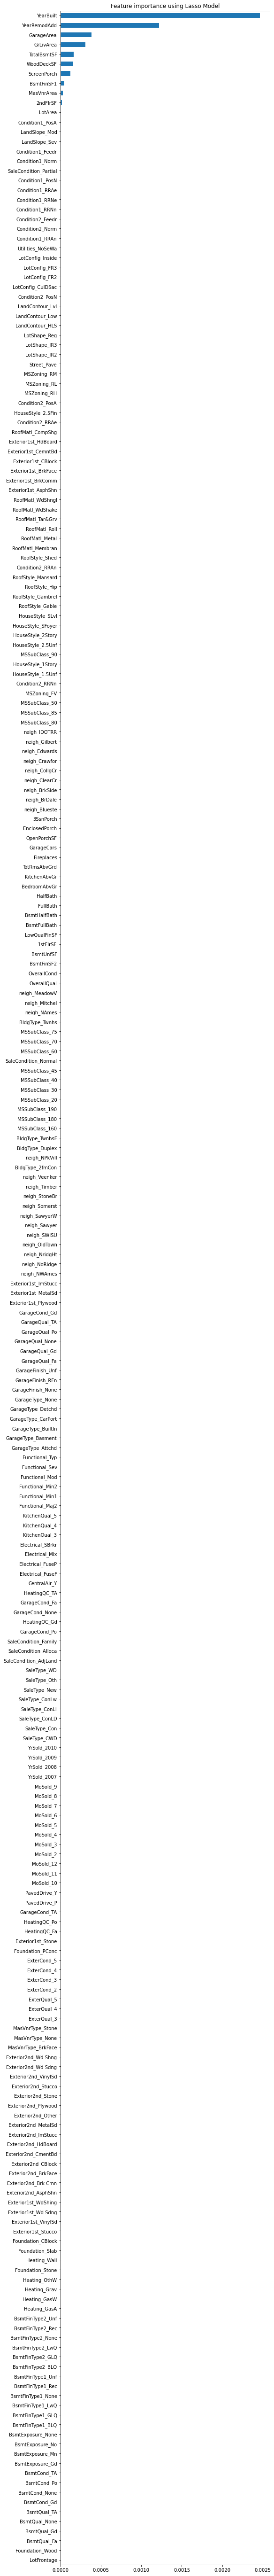

In [87]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [88]:
# RMSE - Ridge
rid = Ridge().fit(X_train, y_train)
rid_pred = rid.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rid_pred, squared=False)

0.13134797776846568

In [89]:
ridge = RidgeCV()
ridge.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X,y))
coef = pd.Series(ridge.coef_, index = X.columns)

Best alpha using built-in RidgeCV: 10.000000
Best score using built-in RidgeCV: 0.919137


Text(0.5, 1.0, 'Feature Importance using Ridge Model')

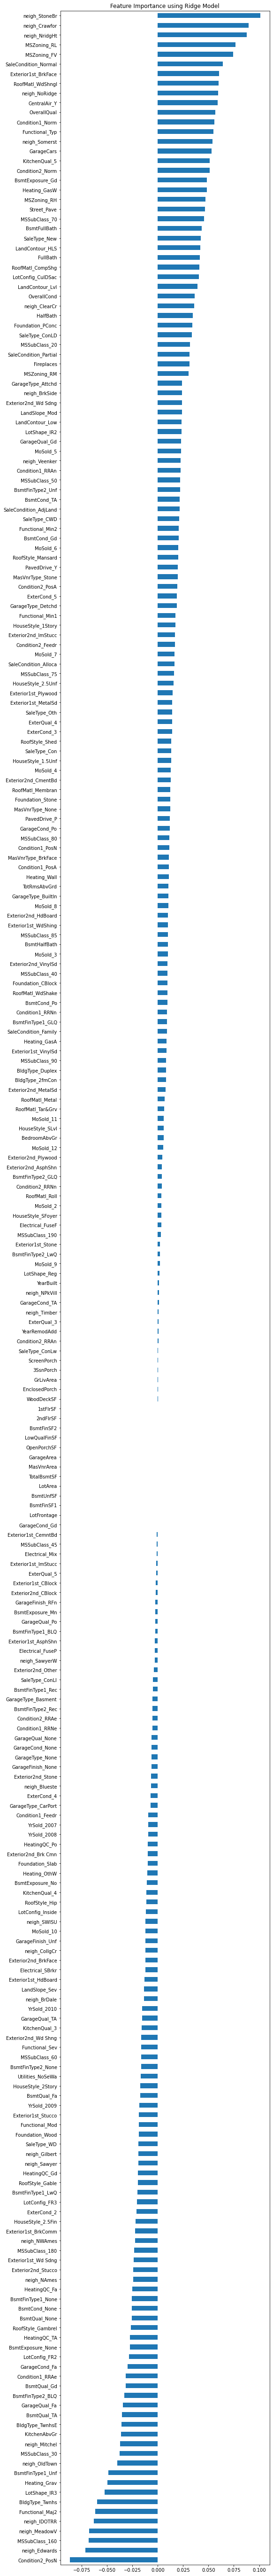

In [90]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance using Ridge Model")

### Domain Knowledge Model